In [1]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras

from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GRU, Dropout, BatchNormalization
#from keras.layers import SimpleRNN, LSTM, MaxPooling1D, MaxPool2D, Conv1D, Conv2D, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import np_utils

In [13]:
mfcc_files = ['../data/mfcc/5lang_10mfcc_022821/' + f for f in listdir('../data/mfcc/5lang_10mfcc_022821/') if 'mfcc.pkl' in f]
target_files = ['../data/target/' + f for f in listdir('../data/target/') if 'target.pkl' in f]

mfcc_files.sort()
target_files.sort()

In [14]:
mfcc_val = ['../data/mfcc/validation/' + f for f in listdir('../data/mfcc/validation/') if 'mfcc.pkl' in f]
target_val = ['../data/target/validation/' + f for f in listdir('../data/target/validation/') if 'target.pkl' in f]    

In [15]:
for f in mfcc_val:
    mfcc_files.append(f)
    
for f in target_val:
    target_files.append(f)

In [16]:
mfcc_files

['../data/mfcc/5lang_10mfcc_022821/en_12130n_10mfcc.pkl',
 '../data/mfcc/5lang_10mfcc_022821/es_11763n_10mfcc.pkl',
 '../data/mfcc/5lang_10mfcc_022821/fr_10894n_10mfcc.pkl',
 '../data/mfcc/5lang_10mfcc_022821/ru_11848n_10mfcc.pkl',
 '../data/mfcc/5lang_10mfcc_022821/zh_11067n_10mfcc.pkl',
 '../data/mfcc/validation/es_122n_10mfcc.pkl',
 '../data/mfcc/validation/zh_96n_10mfcc.pkl',
 '../data/mfcc/validation/en_150n_10mfcc.pkl',
 '../data/mfcc/validation/ru_71n_10mfcc.pkl',
 '../data/mfcc/validation/fr_127n_10mfcc.pkl']

In [17]:
target_files

['../data/target/en_12130n_target.pkl',
 '../data/target/es_11763n_target.pkl',
 '../data/target/fr_10894n_target.pkl',
 '../data/target/ru_11848n_target.pkl',
 '../data/target/zh_11067n_target.pkl',
 '../data/target/validation/es_122n_target.pkl',
 '../data/target/validation/zh_96n_target.pkl',
 '../data/target/validation/en_150n_target.pkl',
 '../data/target/validation/ru_71n_target.pkl',
 '../data/target/validation/fr_127n_target.pkl']

In [18]:
def reload(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [19]:
mfcc_reloaded = [reload(f) for f in mfcc_files]
target_reloaded = [reload(f) for f in target_files]

In [20]:
X = np.concatenate(mfcc_reloaded)

In [21]:
y = np.concatenate(target_reloaded)

In [22]:
# https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [194]:
# X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y)

Null performance

In [71]:
y_train.sum(axis=0)/len(y_train)

array([0.2098579 , 0.20502964, 0.18875998, 0.20514405, 0.19120844],
      dtype=float32)

In [72]:
y_test.sum(axis=0)/len(y_test)

array([0.2134276 , 0.20079632, 0.19029313, 0.20278712, 0.19269583],
      dtype=float32)

Null accuracy = .213

In [27]:
model = Sequential()
model.add(BatchNormalization())
model.add(GRU(64, return_sequences = True))
model.add(GRU(64, return_sequences = True))
model.add(GRU(64))
model.add(Flatten())
model.add(Dropout(.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [28]:
earlystop = EarlyStopping(patience=5)

In [29]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    callbacks=[earlystop],
    epochs=50
)

Epoch 1/50
1366/1366 [==============================] - 34s 22ms/step - loss: 1.5347 - acc: 0.2801 - val_loss: 1.2131 - val_acc: 0.4954
Epoch 2/50
1366/1366 [==============================] - 27s 20ms/step - loss: 1.2021 - acc: 0.5042 - val_loss: 1.0107 - val_acc: 0.6025
Epoch 3/50
1366/1366 [==============================] - 26s 19ms/step - loss: 1.0009 - acc: 0.6107 - val_loss: 0.8795 - val_acc: 0.6666
Epoch 4/50
1366/1366 [==============================] - 27s 20ms/step - loss: 0.8996 - acc: 0.6605 - val_loss: 0.8162 - val_acc: 0.6926
Epoch 5/50
1366/1366 [==============================] - 28s 20ms/step - loss: 0.8249 - acc: 0.6945 - val_loss: 0.7845 - val_acc: 0.7054
Epoch 6/50
1366/1366 [==============================] - 27s 20ms/step - loss: 0.7664 - acc: 0.7203 - val_loss: 0.7197 - val_acc: 0.7299
Epoch 7/50
1366/1366 [==============================] - 27s 20ms/step - loss: 0.7125 - acc: 0.7349 - val_loss: 0.7088 - val_acc: 0.7339
Epoch 8/50
1366/1366 [==========================

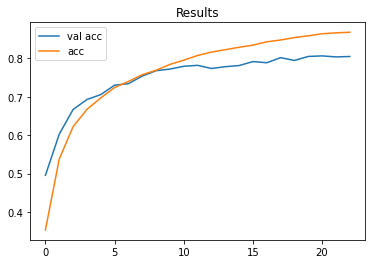

In [30]:
# plot
plt.plot(history.history['val_acc'], label = 'val acc')
plt.plot(history.history['acc'], label = 'acc')
plt.legend()
plt.title('Results');

In [59]:
model.save('../models/5lang_10mfcc_030121.h5', save_format='h5')

In [17]:
# reloaded_model = tensorflow.keras.models.load_model('../models/cnn02252021.h5')

In [31]:
y_out = np.apply_along_axis(np.argmax, axis=1, arr=y_test)

In [34]:
cm = confusion_matrix(y_out, model.predict_classes(X_test))

In [35]:
cm

array([[2461,  196,  111,  194,  147],
       [ 224, 2333,   60,  251,   57],
       [ 146,   88, 2256,  176,  106],
       [ 164,  245,  153, 2324,   68],
       [ 175,  104,   65,  117, 2346]])

In [42]:
cm.sum(axis=1, keepdims=True)

array([[3109],
       [2925],
       [2772],
       [2954],
       [2807]])

In [44]:
cm_norm = np.true_divide(cm, cm.sum(axis=1, keepdims=True))

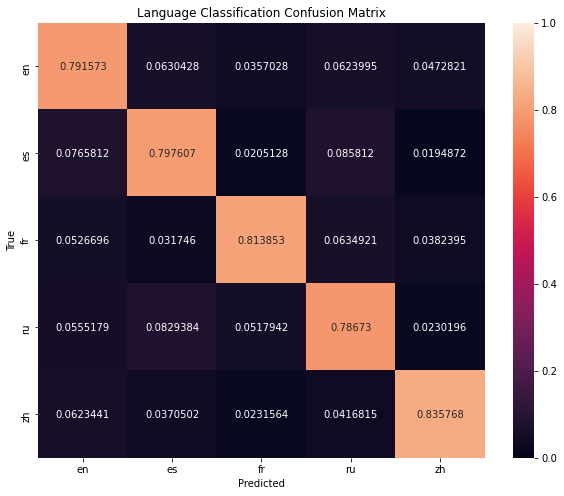

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_norm, annot=True, vmin=0, vmax=1, fmt='g', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Language Classification Confusion Matrix")
plt.show()